In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme()
%matplotlib inline

In [37]:
sinasc_csv = pd.read_csv('dados/SINASC_RO_2019.csv')
sinasc_csv.SEXO.head()

0    Masculino
1     Feminino
2     Feminino
3     Feminino
4     Feminino
Name: SEXO, dtype: object

In [7]:
sinasc_1 = sinasc_csv [['ESCMAE','IDADEMAE','DTNASC']]


In [8]:
sinasc_1.mean()

C:\Users\teste\AppData\Local\Temp\ipykernel_5856\635669246.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  sinasc_1.mean()


IDADEMAE    26.093718
dtype: float64

In [10]:
sinasc_1.ESCMAE.value_counts()

8 a 11 anos        15633
12 anos ou mais     5767
4 a 7 anos          4760
1 a 3 anos           516
Nenhuma               40
Name: ESCMAE, dtype: int64

In [11]:
sinasc_1.groupby('ESCMAE')

In [13]:
sinasc_1.groupby('ESCMAE').mean() #so aparece uma das 3 colunas como media pois é a unica numerica

IDADEMAE
ESCMAE                    
1 a 3 anos       28.430233
12 anos ou mais  29.548119
4 a 7 anos       24.604412
8 a 11 anos      25.150387
Nenhuma          31.575000

In [14]:
sinasc_1.pivot_table(index = 'ESCMAE',
                    aggfunc = 'mean') # tem uma função parecida com o groupby, porem retorna uma dataframe apenas, e não um
                                      # groupbydataframe e ja utiliza a função desejada pra agrupamento

IDADEMAE
ESCMAE                    
1 a 3 anos       28.430233
12 anos ou mais  29.548119
4 a 7 anos       24.604412
8 a 11 anos      25.150387
Nenhuma          31.575000

In [21]:
sinasc_1.groupby('DTNASC')['IDADEMAE'].count().to_frame()  #to_frame tranforma a series em dataframe

IDADEMAE
DTNASC              
2019-01-01        48
2019-01-02        68
2019-01-03        77
2019-01-04        73
2019-01-05        71
...              ...
2019-12-27        84
2019-12-28        59
2019-12-29        48
2019-12-30        76
2019-12-31        51

[365 rows x 1 columns]

<AxesSubplot:xlabel='DTNASC'>

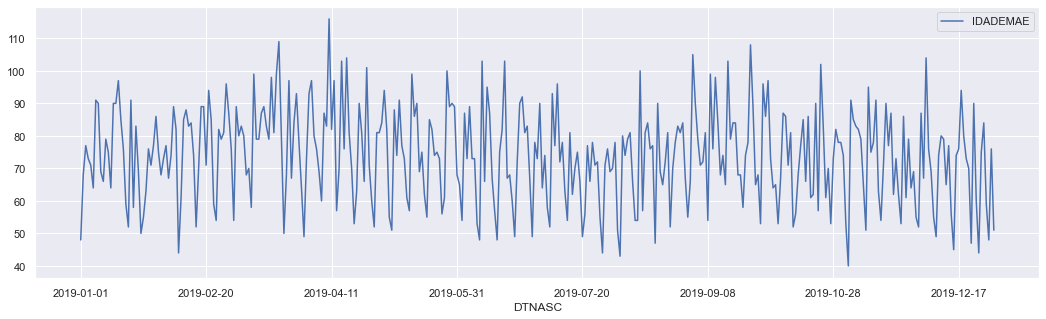

In [24]:
sinasc_1.pivot_table(values = 'IDADEMAE', index = 'DTNASC', aggfunc = 'count').plot(figsize=[18,5])

In [27]:
sinasc_2 = sinasc_csv[['ESCMAE','IDADEMAE','IDADEPAI']]


In [30]:
sinasc_2.dropna().groupby('ESCMAE').median()  #groupby para achar a mediana (median())

IDADEMAE  IDADEPAI
ESCMAE                             
1 a 3 anos           29.0      34.0
12 anos ou mais      30.0      32.0
4 a 7 anos           26.0      30.0
8 a 11 anos          25.0      29.0
Nenhuma              31.5      38.5

In [32]:
result = sinasc_2.dropna().groupby('ESCMAE').median()
result

IDADEMAE  IDADEPAI
ESCMAE                             
1 a 3 anos           29.0      34.0
12 anos ou mais      30.0      32.0
4 a 7 anos           26.0      30.0
8 a 11 anos          25.0      29.0
Nenhuma              31.5      38.5

In [33]:
resultado = sinasc_1.groupby('DTNASC')['IDADEMAE'].mean()

Text(0, 0.5, 'média idade mãe')

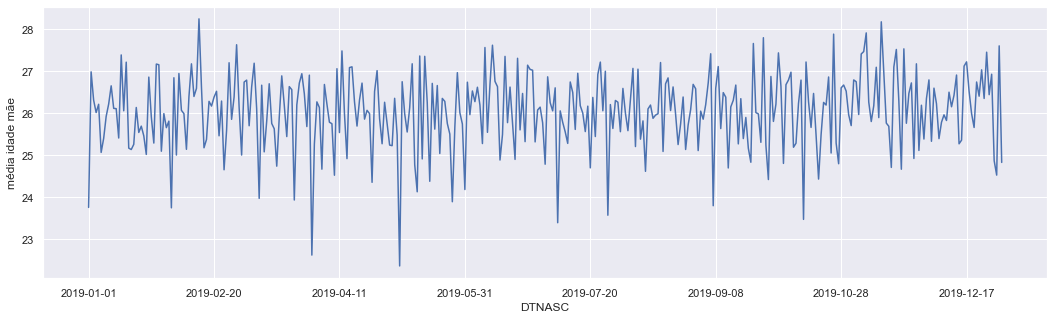

In [35]:
resultado.plot(figsize=[18,5])
plt.ylabel('média idade mãe')

In [42]:
fem = sinasc_csv[sinasc_csv['SEXO'] == 'Feminino'].groupby('DTNASC')['IDADEMAE'].count()
masc = sinasc_csv[sinasc_csv['SEXO'] == 'Masculino'].groupby('DTNASC')['IDADEMAE'].count()


Text(0, 0.5, 'Quantide de bebes')

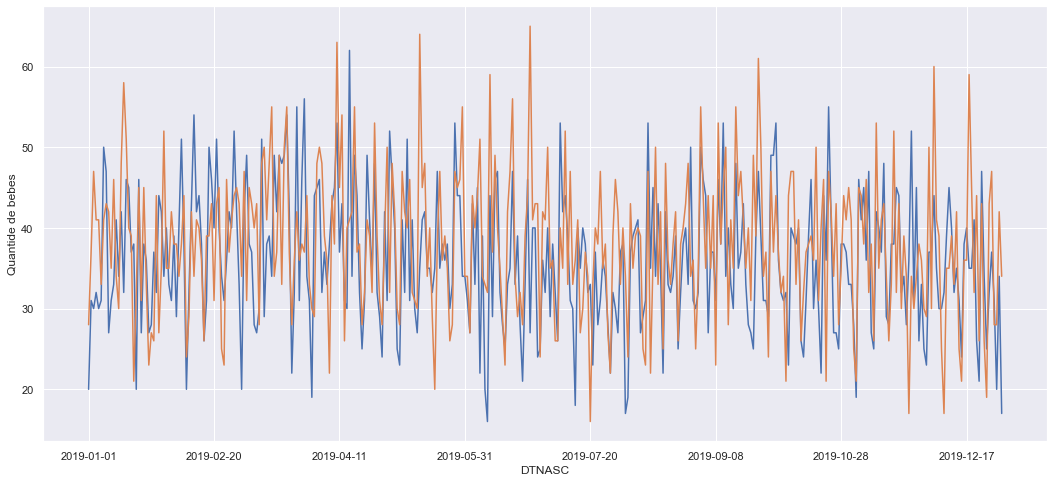

In [48]:
fem.plot(figsize = [18,8])
masc.plot()
plt.ylabel('Quantide de bebes')

In [50]:
sinasc_csv.groupby(['DTNASC','SEXO'])['IDADEMAE'].count().unstack()

SEXO        Feminino  Masculino
DTNASC                         
2019-01-01        20         28
2019-01-02        31         37
2019-01-03        30         47
2019-01-04        32         41
2019-01-05        30         41
...              ...        ...
2019-12-27        37         47
2019-12-28        31         28
2019-12-29        20         28
2019-12-30        34         42
2019-12-31        17         34

[365 rows x 2 columns]

<AxesSubplot:xlabel='DTNASC'>

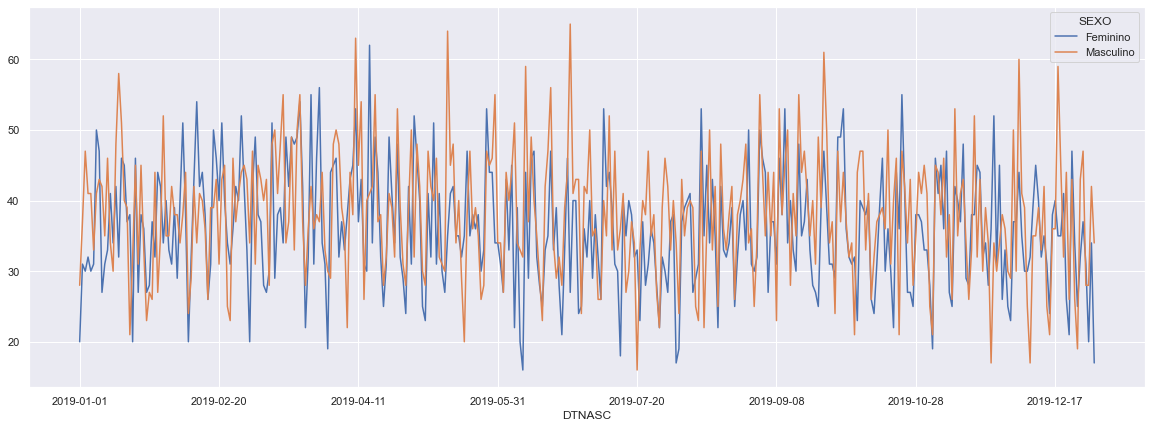

In [53]:
sinasc_csv.groupby(['DTNASC','SEXO'])['IDADEMAE'].count().unstack().plot(figsize = [20,7])